In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [61]:
data_df=pd.read_csv('credit_card_transactions.csv')
data_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [62]:
data_df.shape

(1296675, 24)

In [63]:
data_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [64]:
data_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [65]:
data_df=data_df.drop(columns=['Unnamed: 0','first', 'last', 'street','trans_num','dob'])

In [66]:
data_df['amount']=data_df['amt']
data_df.drop(columns=['amt'],inplace=True)

In [67]:
data_df['timestamp']=data_df['trans_date_trans_time']
data_df.drop(columns=['trans_date_trans_time'],inplace=True)

In [68]:

data_df = data_df.sort_values(['cc_num','unix_time'])

# convert to datetime
data_df['unix_time'] = pd.to_datetime(data_df['unix_time'], unit='s')

# time difference
data_df['time_diff'] = (
    data_df.groupby('cc_num')['unix_time']
    .diff()
    .dt.total_seconds()
    .fillna(0)
)

# tx count in last 24h
data_df['tx_count_24h'] = (
    data_df
    .set_index('unix_time')
    .groupby('cc_num')
    .rolling('86400s')
    .count()['amount']
    .reset_index(level=0, drop=True)
    .reset_index(drop=True)
)

# location change
data_df['location_change'] = (
    data_df.groupby('cc_num')['city']
    .transform(lambda x: (x != x.shift()).astype(int))
)

# device change
data_df['device_change'] = (
    data_df.groupby('cc_num')['job']
    .transform(lambda x: (x != x.shift()).astype(int))
)

# biometric confidence
data_df['biometric_confidence'] = np.where(
    data_df['is_fraud'] == 1,
    np.random.uniform(0.65, 0.85, size=len(data_df)),
    np.random.uniform(0.93, 0.99, size=len(data_df))
)


In [69]:
data_df.head()

,cc_num,merchant,category,gender,city,state,zip,lat,long,city_pop,...,merch_long,is_fraud,merch_zipcode,amount,timestamp,time_diff,tx_count_24h,location_change,device_change,biometric_confidence
1017,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,...,-109.741904,0,NaN,7.27,2019-01-01 12:47:15,0.0,5.0,1,1,0.940449
2724,60416207185,fraud_Berge LLC,gas_transport,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,...,-109.044172,0,NaN,52.94,2019-01-02 08:44:57,71862.0,1.0,0,0,0.981584
2726,60416207185,fraud_Luettgen PLC,gas_transport,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,...,-109.157564,0,NaN,82.08,2019-01-02 08:47:36,159.0,3.0,0,0,0.952195
2882,60416207185,fraud_Daugherty LLC,kids_pets,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,...,-108.747683,0,NaN,34.79,2019-01-02 12:38:14,13838.0,3.0,0,0,0.951463
2907,60416207185,fraud_Beier and Sons,home,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,...,-108.091143,0,82649.0,27.18,2019-01-02 13:10:46,1952.0,3.0,0,0,0.950505


In [70]:
data_df.columns

Index(['cc_num', 'merchant', 'category', 'gender', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode', 'amount', 'timestamp',
       'time_diff', 'tx_count_24h', 'location_change', 'device_change',
       'biometric_confidence'],
      dtype='object')

In [71]:
data_df=data_df.drop(columns=['city','job',"cc_num",'merchant','category','state','zip','gender','timestamp','merch_zipcode'])

In [72]:
data_df.head()

,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amount,time_diff,tx_count_24h,location_change,device_change,biometric_confidence
1017,43.0048,-108.8964,1645,2012-01-01 12:47:15,43.974711,-109.741904,0,7.27,0.0,5.0,1,1,0.940449
2724,43.0048,-108.8964,1645,2012-01-02 08:44:57,42.018766,-109.044172,0,52.94,71862.0,1.0,0,0,0.981584
2726,43.0048,-108.8964,1645,2012-01-02 08:47:36,42.961335,-109.157564,0,82.08,159.0,3.0,0,0,0.952195
2882,43.0048,-108.8964,1645,2012-01-02 12:38:14,42.228227,-108.747683,0,34.79,13838.0,3.0,0,0,0.951463
2907,43.0048,-108.8964,1645,2012-01-02 13:10:46,43.321745,-108.091143,0,27.18,1952.0,3.0,0,0,0.950505


In [73]:
from geopy.distance import geodesic

data_df['distance_km'] = data_df.apply(
    lambda row: geodesic(
        (row['lat'], row['long']),
        (row['merch_lat'], row['merch_long'])
    ).km,
    axis=1
)
data_df=data_df.drop(columns=['lat','long','merch_lat','merch_long'])
data_df.head()

,city_pop,unix_time,is_fraud,amount,time_diff,tx_count_24h,location_change,device_change,biometric_confidence,distance_km
1017,1645,2012-01-01 12:47:15,0,7.27,0.0,5.0,1,1,0.940449,127.629296
2724,1645,2012-01-02 08:44:57,0,52.94,71862.0,1.0,0,0,0.981584,110.202992
2726,1645,2012-01-02 08:47:36,0,82.08,159.0,3.0,0,0,0.952195,21.841827
2882,1645,2012-01-02 12:38:14,0,34.79,13838.0,3.0,0,0,0.951463,87.124420
2907,1645,2012-01-02 13:10:46,0,27.18,1952.0,3.0,0,0,0.950505,74.352876


In [74]:
data_df['hour']=data_df['unix_time'].dt.hour
data_df['day_of_week']=data_df['unix_time'].dt.dayofweek
data_df['is_weekend']=data_df['day_of_week'].apply(lambda x: 1 if x>=5 else 0)
data_df=data_df.drop(columns=['unix_time'])
data_df.head()

,city_pop,is_fraud,amount,time_diff,tx_count_24h,location_change,device_change,biometric_confidence,distance_km,hour,day_of_week,is_weekend
1017,1645,0,7.27,0.0,5.0,1,1,0.940449,127.629296,12,6,1
2724,1645,0,52.94,71862.0,1.0,0,0,0.981584,110.202992,8,0,0
2726,1645,0,82.08,159.0,3.0,0,0,0.952195,21.841827,8,0,0
2882,1645,0,34.79,13838.0,3.0,0,0,0.951463,87.124420,12,0,0
2907,1645,0,27.18,1952.0,3.0,0,0,0.950505,74.352876,13,0,0


In [75]:
data_df.dtypes

city_pop                  int64
is_fraud                  int64
amount                  float64
time_diff               float64
tx_count_24h            float64
location_change           int64
device_change             int64
biometric_confidence    float64
distance_km             float64
hour                      int32
day_of_week               int32
is_weekend                int64
dtype: object

In [76]:
data_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop(columns=['is_fraud']),
    data_df['is_fraud'],
    test_size=0.2,
    random_state=42,
    stratify=data_df['is_fraud']
)



In [78]:
scaler=StandardScaler()
scale_cols = [
    'amount',
    'time_diff',
    'tx_count_24h',
    'distance_km',
    'city_pop'
]
features_to_scale = X_train[scale_cols]
features_X_test_to_scale = X_test[scale_cols]
features_scaled=scaler.fit_transform(features_to_scale)
features_X_test_scaled=scaler.transform(features_X_test_to_scale)

In [79]:
features_scaled=pd.DataFrame(features_scaled, columns=scale_cols, index=X_train.index)
features_X_test_scaled=pd.DataFrame(features_X_test_scaled, columns=scale_cols, index=X_test.index)
X_trainscaled=X_train.copy()
X_test_scaled=X_test.copy()
X_trainscaled[scale_cols]=features_scaled
X_test_scaled[scale_cols]=features_X_test_scaled


In [89]:
model=IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
model.fit(X_trainscaled[y_train==0]) 


IsolationForest(contamination=0.02, random_state=42)

In [90]:
Y_pred_train=model.predict(X_trainscaled)
Y_pred_test = model.predict(X_test_scaled)

In [91]:
y_pred_tr=np.where(Y_pred_train==-1, 1, 0)
print("Training Classification Report:")
print(classification_report(y_train, y_pred_tr))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1031335
           1       0.14      0.54      0.22      6005

    accuracy                           0.98   1037340
   macro avg       0.57      0.76      0.60   1037340
weighted avg       0.99      0.98      0.98   1037340



In [92]:
y_pred_tt=np.where(Y_pred_test==-1, 1, 0)   
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_tt))


Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257834
           1       0.14      0.55      0.22      1501

    accuracy                           0.98    259335
   macro avg       0.57      0.77      0.61    259335
weighted avg       0.99      0.98      0.98    259335



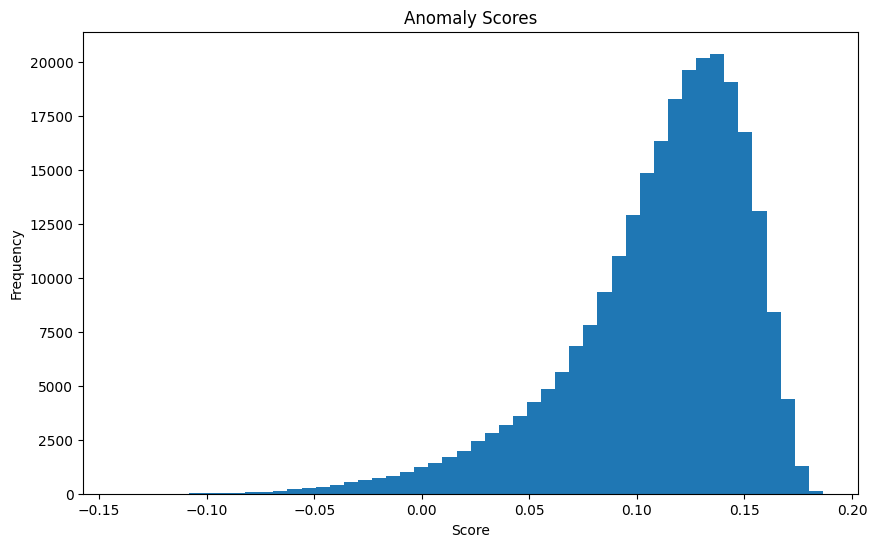

In [93]:
Score=model.decision_function(X_test_scaled)
plt.figure(figsize=(10,6))
plt.hist(Score, bins=50)
plt.title('Anomaly Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()



In [94]:
fraud_score=-Score
fraud_score_norm=(fraud_score-fraud_score.min())/(fraud_score.max()-fraud_score.min())
fraud_score_norm[:10]

array([0.2586977 , 0.09356167, 0.37359972, 0.12711349, 0.3577599 ,
       0.16155281, 0.20870505, 0.28873611, 0.18682374, 0.18786683])

In [88]:
Score.max()

np.float64(0.19659838215852932)